[*********************100%%**********************]  1 of 1 completed
                                   Open          High           Low  \
Datetime                                                              
2023-09-29 09:15:00+05:30  44445.351562  44457.601562  44387.949219   
2023-09-29 09:20:00+05:30  44422.398438  44425.250000  44369.449219   
2023-09-29 09:25:00+05:30  44372.800781  44395.699219  44346.699219   
2023-09-29 09:30:00+05:30  44397.800781  44431.250000  44382.750000   
2023-09-29 09:35:00+05:30  44425.050781  44474.250000  44418.101562   
...                                 ...           ...           ...   
2023-09-29 15:05:00+05:30  44592.699219  44618.351562  44563.250000   
2023-09-29 15:10:00+05:30  44569.851562  44587.199219  44550.300781   
2023-09-29 15:15:00+05:30  44553.800781  44590.449219  44538.199219   
2023-09-29 15:20:00+05:30  44587.148438  44604.199219  44560.601562   
2023-09-29 15:25:00+05:30  44563.101562  44603.351562  44552.550781   

       

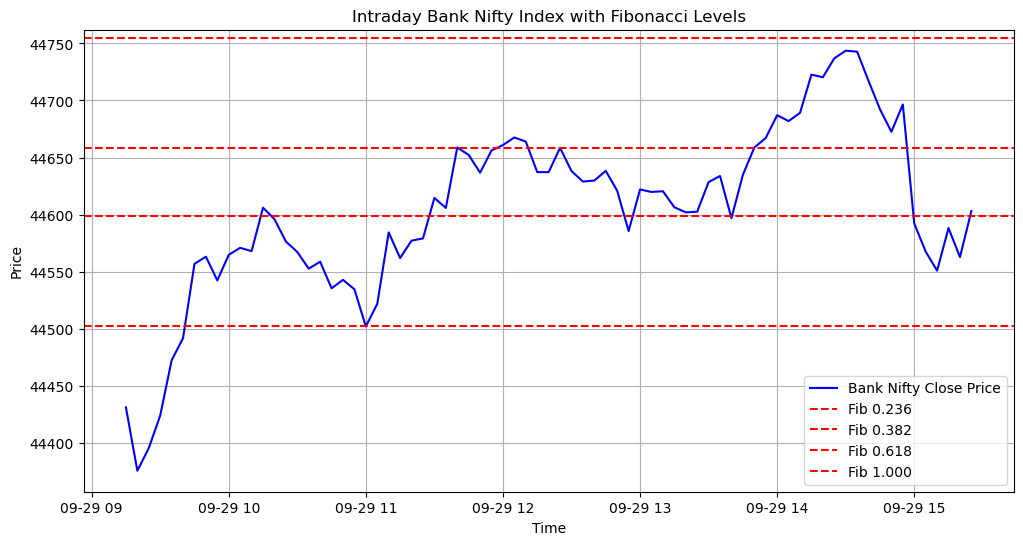

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Bank Nifty (ticker symbol for Nifty Bank Index on Yahoo Finance)
symbol = "^NSEBANK"

# Fetch intraday data
df = yf.download(symbol, period="1d", interval="5m")

# Print the intraday data
print(df)
from matplotlib import pyplot as plt
def calculate_fibonacci_levels(df):
    high = df["High"].max()
    low = df["Low"].min()
    diff = high - low

    levels = {
        "0.236": high - (0.236 * diff),
        "0.382": high - (0.382 * diff),
        "0.618": high - (0.618 * diff),
        "1.000": low + (1.000 * diff),
    }

    return levels

# Main function
def main():
    intraday_data = df
    
    if intraday_data is not None:
        levels = calculate_fibonacci_levels(intraday_data)
        
        # Plot the intraday data and Fibonacci levels
        plt.figure(figsize=(12, 6))
        plt.plot(intraday_data.index, intraday_data["Close"], label="Bank Nifty Close Price", color="blue")
        
        for level, price in levels.items():
            plt.axhline(price, color="red", linestyle="--", label=f"Fib {level}")
        
        plt.title("Intraday Bank Nifty Index with Fibonacci Levels")
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


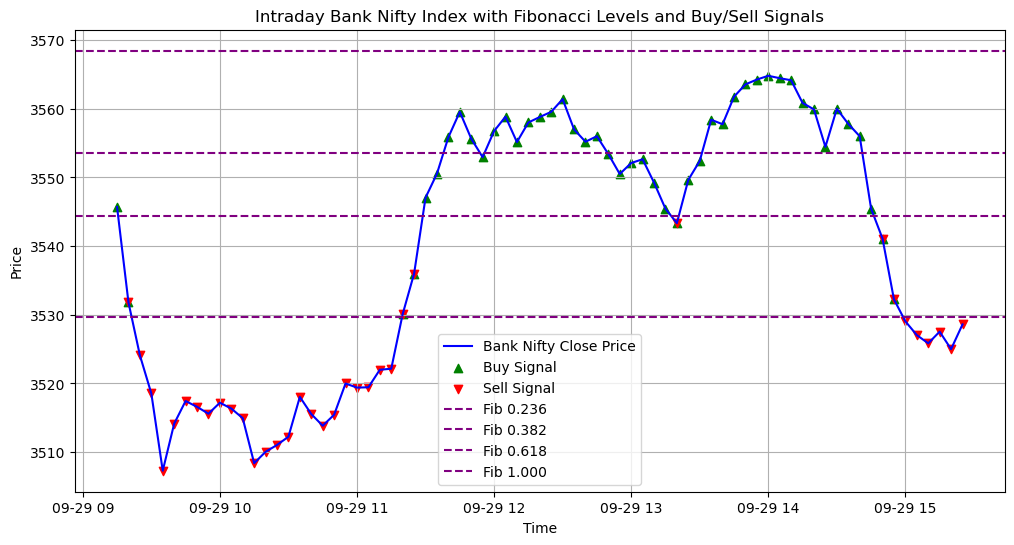

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbol for Bank Nifty (ticker symbol for Nifty Bank Index on Yahoo Finance)
symbol = "TCS.NS"

# Fetch intraday data
df = yf.download(symbol, period="1d", interval="5m")

# Define the Fibonacci retracement levels
def calculate_fibonacci_levels(df):
    high = df["High"].max()
    low = df["Low"].min()
    diff = high - low

    levels = {
        "0.236": high - (0.236 * diff),
        "0.382": high - (0.382 * diff),
        "0.618": high - (0.618 * diff),
        "1.000": low + (1.000 * diff),
    }

    return levels

# Calculate the Fibonacci levels
fibonacci_levels = calculate_fibonacci_levels(df)

# Create a column for buy and sell signals
df["Buy_Signal"] = np.where(df["Close"] >= fibonacci_levels["0.618"], 1, 0)
df["Sell_Signal"] = np.where(df["Close"] <= fibonacci_levels["0.382"], -1, 0)

# Plot the intraday data with buy and sell signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Bank Nifty Close Price", color="blue")

# Plot Buy signals in green and Sell signals in red
plt.scatter(df[df["Buy_Signal"] == 1].index, df[df["Buy_Signal"] == 1]["Close"], marker="^", color="green", label="Buy Signal")
plt.scatter(df[df["Sell_Signal"] == -1].index, df[df["Sell_Signal"] == -1]["Close"], marker="v", color="red", label="Sell Signal")

# Plot Fibonacci levels
for level, price in fibonacci_levels.items():
    plt.axhline(price, color="purple", linestyle="--", label=f"Fib {level}")

plt.title("Intraday Bank Nifty Index with Fibonacci Levels and Buy/Sell Signals")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
